In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Conv2D,MaxPooling2D,Flatten
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
path = 'usps.h5'

with h5py.File(path, 'r') as hf:
    train = hf.get('train')
    X_tr = train.get('data')[:]
    y_tr = train.get('target')[:]
    test = hf.get('test')
    X_te = test.get('data')[:]
    y_te = test.get('target')[:]
# Additional preprocessing steps
# Normalize the data
X_tr = X_tr / 255.0
X_te = X_te / 255.0
# Reshape the target arrays
y_tr = np.reshape(y_tr, (y_tr.shape[0], 1))
y_te = np.reshape(y_te, (y_te.shape[0], 1))

In [ ]:
# Print the shapes of the arrays
print('X_tr shape:', X_tr.shape)
print('y_tr shape:', y_tr.shape)
print('X_te shape:', X_te.shape)
print('y_te shape:', y_te.shape)
# Print a sample data point and its corresponding target label
sample_idx = 0
print('Sample data:', X_tr[sample_idx])
print('Sample target:', y_tr[sample_idx])


X_tr shape: (7291, 256)
y_tr shape: (7291, 1)
X_te shape: (2007, 256)
y_te shape: (2007, 1)
Sample data: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.23529432e-04
 3.65098030e-03 1.63333339e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.56863061e-05 2.54313718e-03
 3.92156886e-03 2.56274524e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.15686283e-03 3.92156886e-03
 3.89411766e-03 8.52941186e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.21568586e-04 3.57843144e-03 3.92156886e-03
 3.06274509e-03 0.00000000e+00 0.00000000

Epoch 1/10
46/46 [==============================] - 4s 25ms/step - loss: 2.2908 - accuracy: 0.1619 - val_loss: 2.2737 - val_accuracy: 0.1693
Epoch 2/10
46/46 [==============================] - 1s 14ms/step - loss: 2.2614 - accuracy: 0.1624 - val_loss: 2.2414 - val_accuracy: 0.1693
Epoch 3/10
46/46 [==============================] - 1s 15ms/step - loss: 2.2346 - accuracy: 0.1624 - val_loss: 2.2110 - val_accuracy: 0.1693
Epoch 4/10
46/46 [==============================] - 1s 14ms/step - loss: 2.1998 - accuracy: 0.2131 - val_loss: 2.1645 - val_accuracy: 0.3146
Epoch 5/10
46/46 [==============================] - 1s 14ms/step - loss: 2.1463 - accuracy: 0.2973 - val_loss: 2.0942 - val_accuracy: 0.3160
Epoch 6/10
46/46 [==============================] - 1s 14ms/step - loss: 2.0698 - accuracy: 0.2977 - val_loss: 2.0006 - val_accuracy: 0.3146
Epoch 7/10
46/46 [==============================] - 1s 15ms/step - loss: 1.9721 - accuracy: 0.2982 - val_loss: 1.8884 - val_accuracy: 0.3235
Epoch 8/10
46

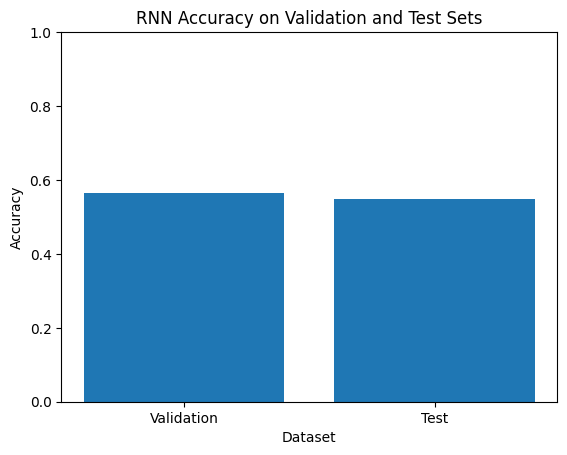

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

# Reshape the data for the RNN model
X_train = np.reshape(X_train, (X_train.shape[0], 1, -1))
X_val = np.reshape(X_val, (X_val.shape[0], 1, -1))
X_te = np.reshape(X_te, (X_te.shape[0], 1, -1))

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(128, input_shape=(1, X_train.shape[2])))
model_rnn.add(Dense(10, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model
model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# Evaluate the RNN model on the test set
rnn_test_loss, rnn_test_accuracy = model_rnn.evaluate(X_te, y_te)
print('RNN Test Loss:', rnn_test_loss)
print('RNN Test Accuracy:', rnn_test_accuracy)

# Evaluate the RNN model on the validation set
rnn_val_loss, rnn_val_accuracy = model_rnn.evaluate(X_val, y_val)
print('RNN Validation Loss:', rnn_val_loss)
print('RNN Validation Accuracy:', rnn_val_accuracy)


results = pd.DataFrame({'Accuracy': [rnn_val_accuracy,rnn_test_accuracy ]},
                       index=['Validation', 'Test'])

# Display the results as a table
print(results)

# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('RNN Accuracy on Validation and Test Sets')
plt.ylim(0, 1.0)
plt.show()



Epoch 1/10
46/46 [==============================] - 3s 52ms/step - loss: 2.2835 - accuracy: 0.1612 - val_loss: 2.2665 - val_accuracy: 0.1693
Epoch 2/10
46/46 [==============================] - 3s 58ms/step - loss: 2.2718 - accuracy: 0.1624 - val_loss: 2.2651 - val_accuracy: 0.1693
Epoch 3/10
46/46 [==============================] - 2s 43ms/step - loss: 2.2689 - accuracy: 0.1624 - val_loss: 2.2606 - val_accuracy: 0.1693
Epoch 4/10
46/46 [==============================] - 2s 40ms/step - loss: 2.2587 - accuracy: 0.1624 - val_loss: 2.2371 - val_accuracy: 0.1693
Epoch 5/10
46/46 [==============================] - 2s 35ms/step - loss: 2.2020 - accuracy: 0.2539 - val_loss: 2.0980 - val_accuracy: 0.3153
Epoch 6/10
46/46 [==============================] - 2s 37ms/step - loss: 1.9339 - accuracy: 0.3157 - val_loss: 1.6715 - val_accuracy: 0.4304
Epoch 7/10
46/46 [==============================] - 2s 37ms/step - loss: 1.5043 - accuracy: 0.5165 - val_loss: 1.2482 - val_accuracy: 0.6498
Epoch 8/10
46

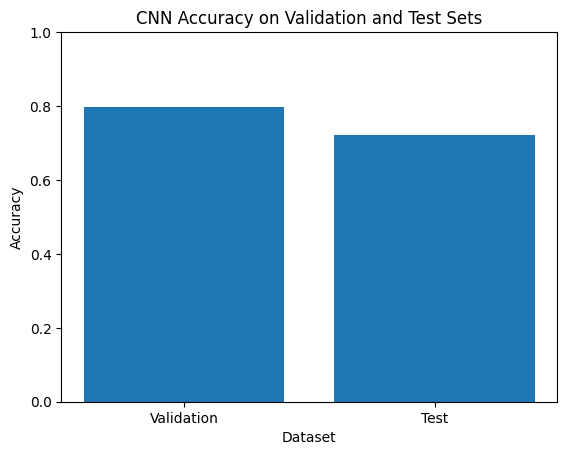

In [ ]:
# Reshape the data for the CNN model
X_tr = np.reshape(X_tr, (-1, 16, 16, 1))
X_te = np.reshape(X_te, (-1, 16, 16, 1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the CNN model
model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)

# Evaluate the CNN model on the test set
cnn_test_loss, cnn_test_accuracy = model_cnn.evaluate(X_te, y_te)
print('CNN Test Loss:', cnn_test_loss)
print('CNN Test Accuracy:', cnn_test_accuracy)

cnn_val_loss, cnn_val_accuracy = model_cnn.evaluate(X_val, y_val)
print('CNN Validation Loss:', cnn_val_loss)
print('CNN Validation Accuracy:', cnn_val_accuracy)

results = pd.DataFrame({'Accuracy': [cnn_val_accuracy,cnn_test_accuracy ]},
                       index=['Validation', 'Test'])

# Display the results as a table
print(results)

# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('CNN Accuracy on Validation and Test Sets')
plt.ylim(0, 1.0)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation Accuracy: 0.9300891021247429
Test Accuracy: 0.8948679621325362
            Accuracy
Validation  0.930089
Test        0.894868


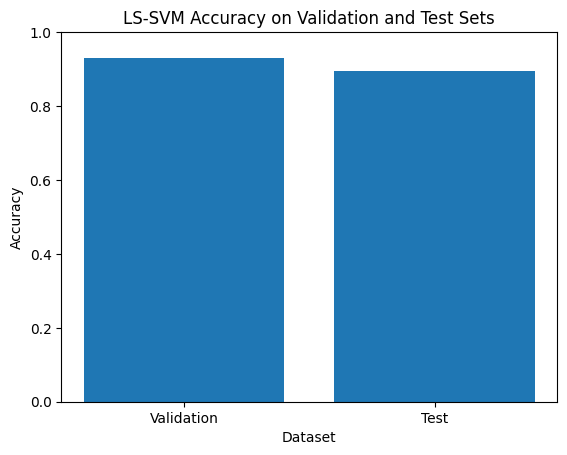

In [ ]:
# Reshape the data
X_tr = np.reshape(X_tr, (X_tr.shape[0], -1))
X_te = np.reshape(X_te, (X_te.shape[0], -1))

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

# Define the LS-SVM model (using NuSVC as a substitute)
model_lssvm = NuSVC()

# Train the LS-SVM model
model_lssvm.fit(X_train, y_train)

# Predict labels for the validation and test sets
y_val_pred = model_lssvm.predict(X_val)
y_te_pred = model_lssvm.predict(X_te)

# Calculate accuracy scores
SVM_val_accuracy = accuracy_score(y_val, y_val_pred)
SVM_test_accuracy = accuracy_score(y_te, y_te_pred)

print('Validation Accuracy:', SVM_val_accuracy)
print('Test Accuracy:', SVM_test_accuracy)

results = pd.DataFrame({'Accuracy': [SVM_val_accuracy,SVM_test_accuracy ]},
                       index=['Validation', 'Test'])

# Display the results as a table
print(results)

# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('LS-SVM Accuracy on Validation and Test Sets')
plt.ylim(0, 1.0)
plt.show()


63/63 [==============================] - 0s 6ms/step
Validation Accuracy: 0.9273474982864977
Test Accuracy: 0.8849028400597907
            Accuracy
Validation  0.927347
Test        0.884903


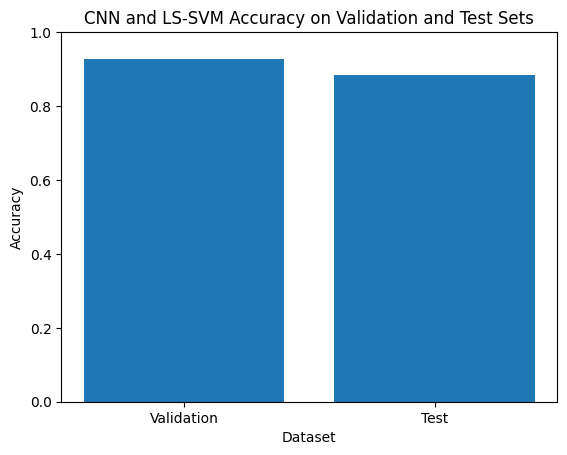

In [ ]:
# Reshape the data for the CNN model
X_tr_cnn = np.reshape(X_tr, (-1, 16, 16, 1))
X_te_cnn = np.reshape(X_te, (-1, 16, 16, 1))

# Split the data into training and validation sets
X_train_cnn, X_val_cnn, y_train, y_val = train_test_split(X_tr_cnn, y_tr, test_size=0.2, random_state=42)

# Reshape the target variables to 1D arrays
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_te = np.ravel(y_te)

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())

# Extract CNN features for the training and validation sets
X_train_features = model_cnn.predict(X_train_cnn)
X_val_features = model_cnn.predict(X_val_cnn)
X_te_features = model_cnn.predict(X_te_cnn)

# Train the LS-SVM model using the CNN features
model_lssvm = NuSVC()
model_lssvm.fit(X_train_features, y_train)

# Predict labels for the validation and test sets
y_val_pred = model_lssvm.predict(X_val_features)
y_te_pred = model_lssvm.predict(X_te_features)

# Calculate accuracy scores
val_accuracy_CNN_SVM = (y_val_pred == y_val).mean()
test_accuracy_CNN_SVM = (y_te_pred == y_te).mean()

print('Validation Accuracy:', val_accuracy_CNN_SVM)
print('Test Accuracy:', test_accuracy_CNN_SVM)

results = pd.DataFrame({'Accuracy': [val_accuracy_CNN_SVM, test_accuracy_CNN_SVM]},
                       index=['Validation', 'Test'])

# Display the results as a table
print(results)

# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('CNN and LS-SVM Accuracy on Validation and Test Sets')
plt.ylim(0, 1.0)
plt.show()

63/63 [==============================] - 0s 3ms/step
LS-SVM Validation Accuracy: 0.9328307059629883
LS-SVM Test Accuracy: 0.8953662182361734
            Accuracy
Validation  0.932831
Test        0.895366


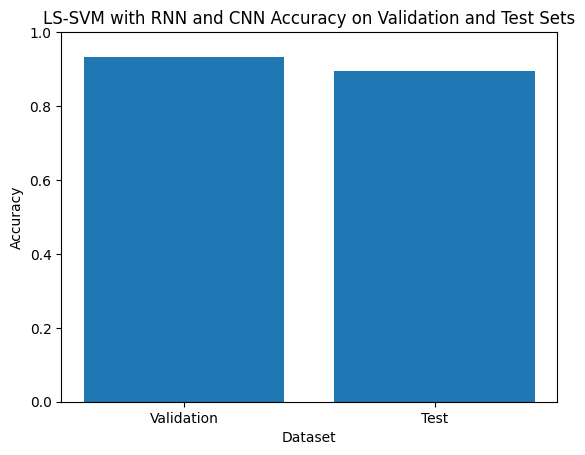

In [ ]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dropout

path = 'usps.h5'

with h5py.File(path, 'r') as hf:
    train = hf.get('train')
    X_tr = train.get('data')[:]
    y_tr = train.get('target')[:]
    test = hf.get('test')
    X_te = test.get('data')[:]
    y_te = test.get('target')[:]

# Reshape the data for the CNN model
X_tr_cnn = np.reshape(X_tr, (-1, 16, 16, 1))
X_te_cnn = np.reshape(X_te, (-1, 16, 16, 1))

# Reshape the data for the RNN model
X_tr_rnn = np.reshape(X_tr, (X_tr.shape[0], 1, -1))
X_te_rnn = np.reshape(X_te, (X_te.shape[0], 1, -1))

# Split the data into training and validation sets
X_train_cnn, X_val_cnn, y_train, y_val = train_test_split(X_tr_cnn, y_tr, test_size=0.2, random_state=42)
X_train_rnn, X_val_rnn, _, _ = train_test_split(X_tr_rnn, y_tr, test_size=0.2, random_state=42)

# Step 1: CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(16, 16, 1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())

# Step 2: RNN Model
rnn_model = Sequential()
rnn_model.add(LSTM(128, input_shape=(1, X_train_rnn.shape[2])))
# Add regularization to the LSTM layer
rnn_model.add(Dropout(0.2))

# Step 3: LS-SVM Model
cnn_features_train = cnn_model.predict(X_train_cnn)
cnn_features_val = cnn_model.predict(X_val_cnn)
cnn_features_test = cnn_model.predict(X_te_cnn)

rnn_features_train = rnn_model.predict(X_train_rnn)
rnn_features_val = rnn_model.predict(X_val_rnn)
rnn_features_test = rnn_model.predict(X_te_rnn)

#combined_features_train
# Step 3: LS-SVM Model
cnn_features_train = cnn_model.predict(X_train_cnn)
cnn_features_val = cnn_model.predict(X_val_cnn)
cnn_features_test = cnn_model.predict(X_te_cnn)

rnn_features_train = rnn_model.predict(X_train_rnn)
rnn_features_val = rnn_model.predict(X_val_rnn)
rnn_features_test = rnn_model.predict(X_te_rnn)

combined_features_train = np.concatenate((cnn_features_train, rnn_features_train), axis=1)
combined_features_val = np.concatenate((cnn_features_val, rnn_features_val), axis=1)
combined_features_test = np.concatenate((cnn_features_test, rnn_features_test), axis=1)

lssvm_model = NuSVC()
lssvm_model.fit(combined_features_train, np.ravel(y_train))

# Step 4: Predictions and Evaluation
lssvm_predictions_val = lssvm_model.predict(combined_features_val)
lssvm_predictions_test = lssvm_model.predict(combined_features_test)

# Evaluate the LS-SVM predictions on the validation set
lssvm_CNN_RNN_accuracy_val = (lssvm_predictions_val == y_val).mean()
print('LS-SVM Validation Accuracy:', lssvm_CNN_RNN_accuracy_val)

# Evaluate the LS-SVM predictions on the test set
lssvm_CNN_RNN_accuracy_test = (lssvm_predictions_test == y_te).mean()
print('LS-SVM Test Accuracy:', lssvm_CNN_RNN_accuracy_test)

# Create a DataFrame for the results
results = pd.DataFrame({'Accuracy': [lssvm_CNN_RNN_accuracy_val, lssvm_CNN_RNN_accuracy_test]},
                       index=['Validation', 'Test'])

# Display the results as a table
print(results)

# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('LS-SVM with RNN and CNN Accuracy on Validation and Test Sets')
plt.ylim(0, 1.0)
plt.show()


                            Accuracy
RNN_Validation              0.563400
CNN_val_accuracy            0.797807
LSSVM_val_accuracy          0.930089
CNN_SVM_val_accuracy        0.927347
lssvm_CNN_RNN_accuracy_val  0.932831


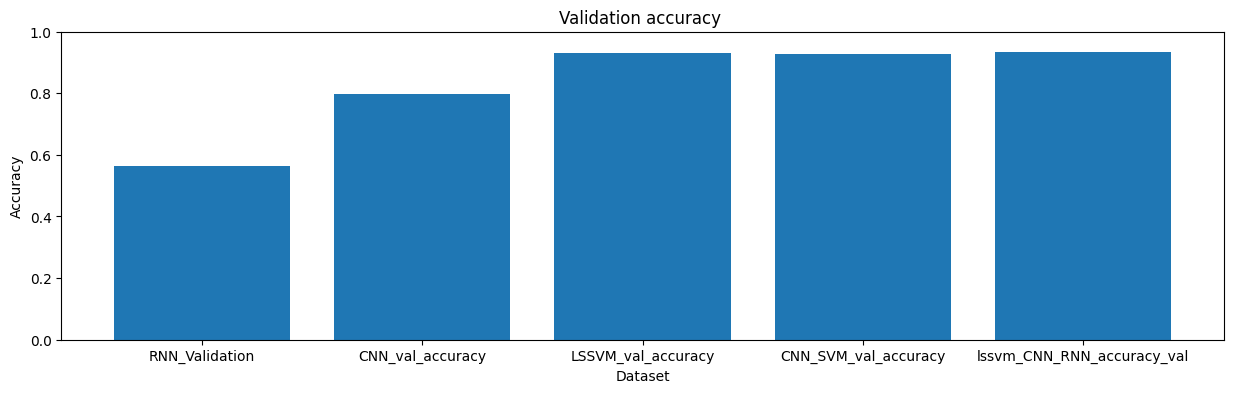

In [ ]:
#final result comparison of validation set
results = pd.DataFrame({'Accuracy': [rnn_val_accuracy, cnn_val_accuracy,SVM_val_accuracy,val_accuracy_CNN_SVM,lssvm_CNN_RNN_accuracy_val]},
                       index=['RNN_Validation', 'CNN_val_accuracy','LSSVM_val_accuracy','CNN_SVM_val_accuracy','lssvm_CNN_RNN_accuracy_val'])

# Display the results as a table
print(results)

plt.figure(figsize=(15, 4)) 
# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Validation accuracy ')
plt.ylim(0, 1.0)
plt.show()

                             Accuracy
RNN_test_accuracy            0.548082
CNN_test_accuracy            0.722970
LSSVM_test_accuracy          0.894868
CNN_SVM_test_accuracy        0.884903
lssvm_CNN_RNN_accuracy_test  0.895366


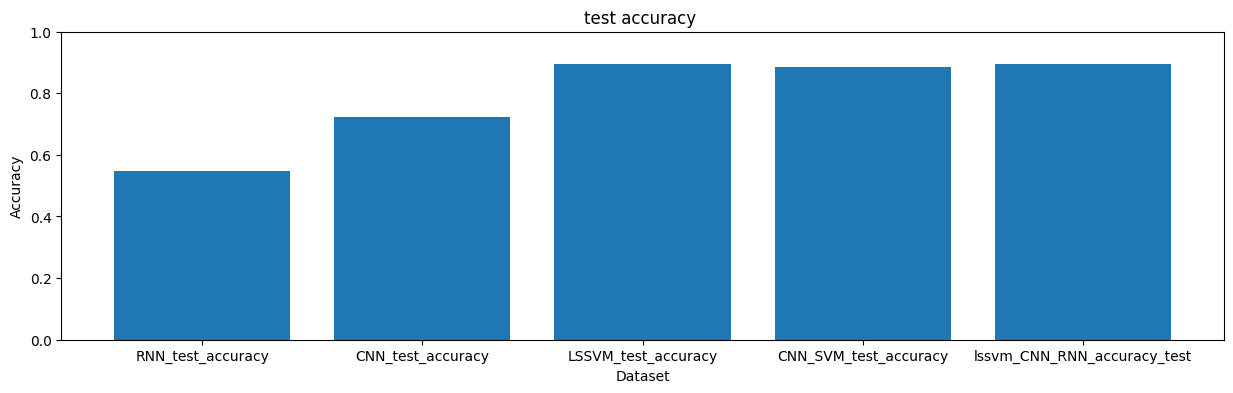

In [ ]:
#final result comparison of test set
results = pd.DataFrame({'Accuracy': [rnn_test_accuracy, cnn_test_accuracy,SVM_test_accuracy,test_accuracy_CNN_SVM,lssvm_CNN_RNN_accuracy_test]},
                       index=['RNN_test_accuracy', 'CNN_test_accuracy','LSSVM_test_accuracy','CNN_SVM_test_accuracy','lssvm_CNN_RNN_accuracy_test'])

# Display the results as a table
print(results)

plt.figure(figsize=(15, 4)) 
# Create a bar plot to visualize the accuracies
plt.bar(results.index, results['Accuracy'])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('test accuracy ')
plt.ylim(0, 1.0)
plt.show()